# Eigenvalues and Eigenvectors


$$A\,x=\lambda\,x$$


where $\lambda$ are the scale factors. 

## Linear transformations:

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our matrix

a_matrix = np.array([[2, 0],[0, 1]])

In [3]:
print(a_matrix)

[[2 0]
 [0 1]]


### Any vector:

In [4]:
# Define our vector

x = np.array([[1],[1]])

In [5]:
print(x)

[[1]
 [1]]


In [6]:
# Linear equation
#b = np.dot(a_matrix, x)

b = a_matrix @ x

In [7]:
print(b)

[[2]
 [1]]


In [8]:
print(b[1])

[1]


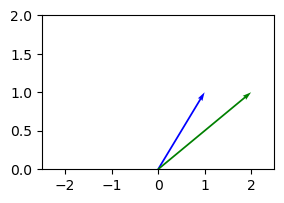

In [9]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x[0],x[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b[0],b[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(0, 2)

plt.show()

### Special vector:

In [10]:
# New vector:
x1 = np.array([[1],[0]])

In [11]:
# Transformed vector

b1 = a_matrix @ x1

In [12]:
print(b1)

[[2]
 [0]]


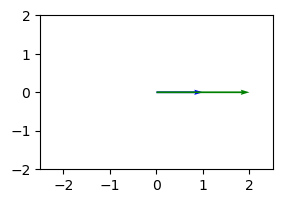

In [13]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x1[0],x1[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b1[0],b1[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(-2, 2)

plt.show()

### 1. Get eigenvalues and eigenvectors using np.linalg.eig

This numpy function computec the eigenvalues and right eigenvectors of a square array.


In [14]:
print(a_matrix)

[[2 0]
 [0 1]]


In [15]:
# Syntax

w_eigenvalues, v_eigenvectors = np.linalg.eig(a_matrix)

In [16]:
# Eigenvalues 

print(w_eigenvalues)

[2. 1.]


In [17]:
# Eigenvectors

print(v_eigenvectors)

[[1. 0.]
 [0. 1.]]


In [18]:
# Define the second eigenvector 

x2 = np.array([[0],[1]])

print(x2)

[[0]
 [1]]


In [20]:
# LT of this vector

b2 = a_matrix @ x2

print(b2)

[[0]
 [1]]


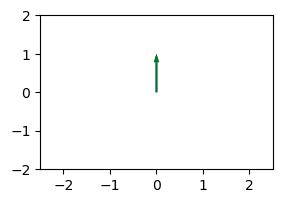

In [21]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x2[0],x2[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b2[0],b2[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(-2, 2)

plt.show()

## 2. Finding the largest eigenvalue

Assume $\lambda_1$ is the largest eigenvalue, as $k$ grows the following equation will converge to the first term.

$$ Ax_{k-1} = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k$$ 

In [22]:
w, v = np.linalg.eig(a_matrix)

print(w)

[2. 1.]


In [23]:
iteration = 1

for i in range(iteration):
    x = np.dot(a_matrix, x)
    #print(x)
    fac = np.max(abs(x))
    x_n = x / np.max(x)
    print(fac, x_n)

2 [[1. ]
 [0.5]]


## 3. The QR method:

This is a method to find the eigenvalues of a matrix in one go.

We say that 2 square matrices $A$ and $B$ are similar if:

$$A = C^{-1}BC$$

In [27]:
# Define a new matrix
b_matrix = np.array([[0, 2], [2, 3]])

# Get the Q and R matrices

q, r = np.linalg.qr(b_matrix)

print(b_matrix)

[[0 2]
 [2 3]]


In [25]:
print('Q:\n', q)

print('R:\n', r)


Q:
 [[ 0. -1.]
 [-1.  0.]]
R:
 [[-2. -3.]
 [ 0. -2.]]


In [26]:
b = np.dot(q, r)
print('QR:\n', b)

QR:
 [[0. 2.]
 [2. 3.]]


In [28]:
# Get eigenvalues in the easy way

print(np.linalg.eig(b_matrix))

(array([-1.,  4.]), array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))


In [30]:
# Define # iterations
p = [1, 5, 10, 20]

for i in range(20):
    # Split Q and R matrices
    q, r = np.linalg.qr(b_matrix)
    b_matrix = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(b_matrix)

Iteration 1:
[[ 3.92307692  0.61538462]
 [ 0.61538462 -0.92307692]]
Iteration 5:
[[ 3.99999881e+00  2.44140567e-03]
 [ 2.44140567e-03 -9.99998808e-01]]
Iteration 10:
[[ 4.00000000e+00  2.38418579e-06]
 [ 2.38418579e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  2.27386092e-12]
 [ 2.27373675e-12 -1.00000000e+00]]
